In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the data
df = pd.read_csv('../data/hcv_data.csv')

# Basic information
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn Names and Types:")
print(df.dtypes)
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: 615 rows, 14 columns

Column Names and Types:
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

First 5 rows:


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
# Feature descriptions (from UCI documentation)
feature_descriptions = {
    'Age': 'Age in years',
    'Sex': 'Gender (m/f)', 
    'ALB': 'Albumin (g/L) - protein made by liver',
    'ALP': 'Alkaline phosphatase (IU/L) - enzyme in liver',
    'ALT': 'Alanine aminotransferase (IU/L) - liver enzyme',
    'AST': 'Aspartate aminotransferase (IU/L) - liver enzyme',
    'BIL': 'Bilirubin (μmol/L) - substance from red blood cells',
    'CHE': 'Cholinesterase (kU/L) - enzyme',
    'CHOL': 'Cholesterol (mmol/L)',
    'CREA': 'Creatinine (μmol/L) - kidney function marker',
    'GGT': 'Gamma-glutamyl transferase (IU/L) - liver enzyme',
    'PROT': 'Total protein (g/L)',
    'Category': 'Diagnosis (0=Blood Donor, 0s=Suspect, 1=Hepatitis, 2=Fibrosis, 3=Cirrhosis)'
}

for feature, description in feature_descriptions.items():
    print(f"{feature:10s}: {description}")

Age       : Age in years
Sex       : Gender (m/f)
ALB       : Albumin (g/L) - protein made by liver
ALP       : Alkaline phosphatase (IU/L) - enzyme in liver
ALT       : Alanine aminotransferase (IU/L) - liver enzyme
AST       : Aspartate aminotransferase (IU/L) - liver enzyme
BIL       : Bilirubin (μmol/L) - substance from red blood cells
CHE       : Cholinesterase (kU/L) - enzyme
CHOL      : Cholesterol (mmol/L)
CREA      : Creatinine (μmol/L) - kidney function marker
GGT       : Gamma-glutamyl transferase (IU/L) - liver enzyme
PROT      : Total protein (g/L)
Category  : Diagnosis (0=Blood Donor, 0s=Suspect, 1=Hepatitis, 2=Fibrosis, 3=Cirrhosis)


Target Variable Distribution:
Category
0=Blood Donor             533
0s=suspect Blood Donor      7
1=Hepatitis                24
2=Fibrosis                 21
3=Cirrhosis                30
Name: count, dtype: int64

Percentage Distribution:
Category
0=Blood Donor             86.666667
0s=suspect Blood Donor     1.138211
1=Hepatitis                3.902439
2=Fibrosis                 3.414634
3=Cirrhosis                4.878049
Name: proportion, dtype: float64


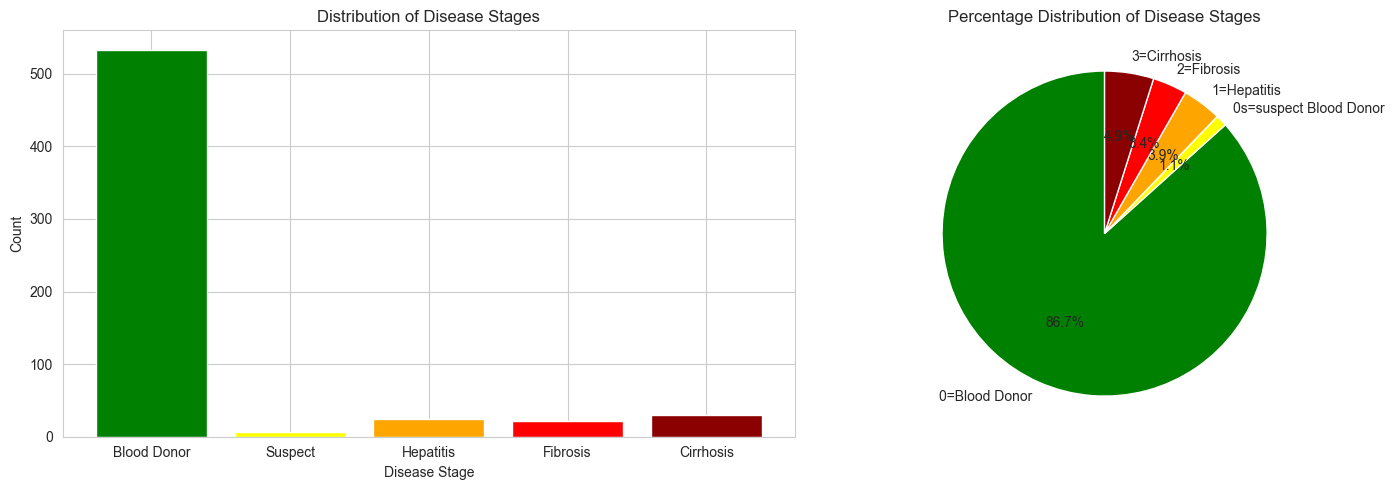


⚠️ SEVERE CLASS IMBALANCE DETECTED!
Blood Donors: ~86% of data
Suspect Blood Donors: ~1% (only 7 samples - will need to handle)


In [4]:
# Examine the target variable
print("Target Variable Distribution:")
print(df['Category'].value_counts().sort_index())
print("\nPercentage Distribution:")
print(df['Category'].value_counts(normalize=True).sort_index() * 100)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
category_counts = df['Category'].value_counts().sort_index()
axes[0].bar(category_counts.index, category_counts.values, 
            color=['green', 'yellow', 'orange', 'red', 'darkred'])
axes[0].set_xlabel('Disease Stage')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Disease Stages')
axes[0].set_xticks(range(len(category_counts)))
axes[0].set_xticklabels(['Blood Donor', 'Suspect', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])

# Pie chart
axes[1].pie(category_counts.values, labels=category_counts.index, 
            autopct='%1.1f%%', startangle=90,
            colors=['green', 'yellow', 'orange', 'red', 'darkred'])
axes[1].set_title('Percentage Distribution of Disease Stages')

plt.tight_layout()
plt.show()

# Key observation
print("\n⚠️ SEVERE CLASS IMBALANCE DETECTED!")
print("Blood Donors: ~86% of data")
print("Suspect Blood Donors: ~1% (only 7 samples - will need to handle)")

Missing Data Summary:
     Column  Missing_Count  Missing_Percentage
ALP     ALP             18            2.926829
CHOL   CHOL             10            1.626016
ALB     ALB              1            0.162602
ALT     ALT              1            0.162602
PROT   PROT              1            0.162602


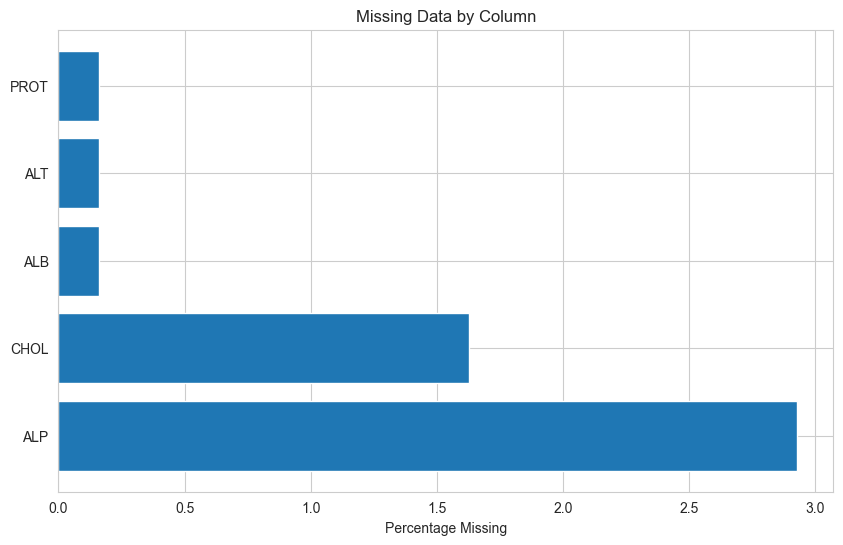

In [5]:
# Check missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print("Missing Data Summary:")
    print(missing_data)
    
    # Visualize missing data
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
    plt.xlabel('Percentage Missing')
    plt.title('Missing Data by Column')
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

In [6]:
# Statistical summary by disease stage
print("Statistical Summary by Disease Stage:\n")

# Group by Category and get statistics
for category in sorted(df['Category'].unique()):
    print(f"\n{'='*50}")
    print(f"Category: {category}")
    print(f"{'='*50}")
    cat_data = df[df['Category'] == category].select_dtypes(include=[np.number])
    print(cat_data.describe().round(2))

Statistical Summary by Disease Stage:


Category: 0=Blood Donor
       Unnamed: 0     Age     ALB     ALP     ALT     AST     BIL     CHE  \
count      533.00  533.00  533.00  533.00  533.00  533.00  533.00  533.00   
mean       267.00   47.13   42.24   68.37   26.63   26.55    8.53    8.40   
std        154.01    9.62    5.03   18.23   14.50   10.62    6.09    1.88   
min          1.00   32.00   26.20   27.00    2.50   12.00    1.80    3.90   
25%        134.00   39.00   39.20   55.30   17.20   21.10    5.00    7.10   
50%        267.00   47.00   42.20   66.70   23.10   24.80    6.90    8.35   
75%        400.00   53.00   45.40   79.60   32.30   29.80   10.10    9.62   
max        533.00   77.00   82.20  145.00  118.10  188.70   59.10   15.43   

         CHOL    CREA     GGT    PROT  
count  526.00  533.00  533.00  533.00  
mean     5.49   78.98   29.04   72.11  
std      1.06   14.51   24.74    4.55  
min      2.79    8.00    4.50   51.00  
25%      4.70   69.00   15.10   69.40  
50

Numeric features to plot: ['Unnamed: 0', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
Total numeric features: 12


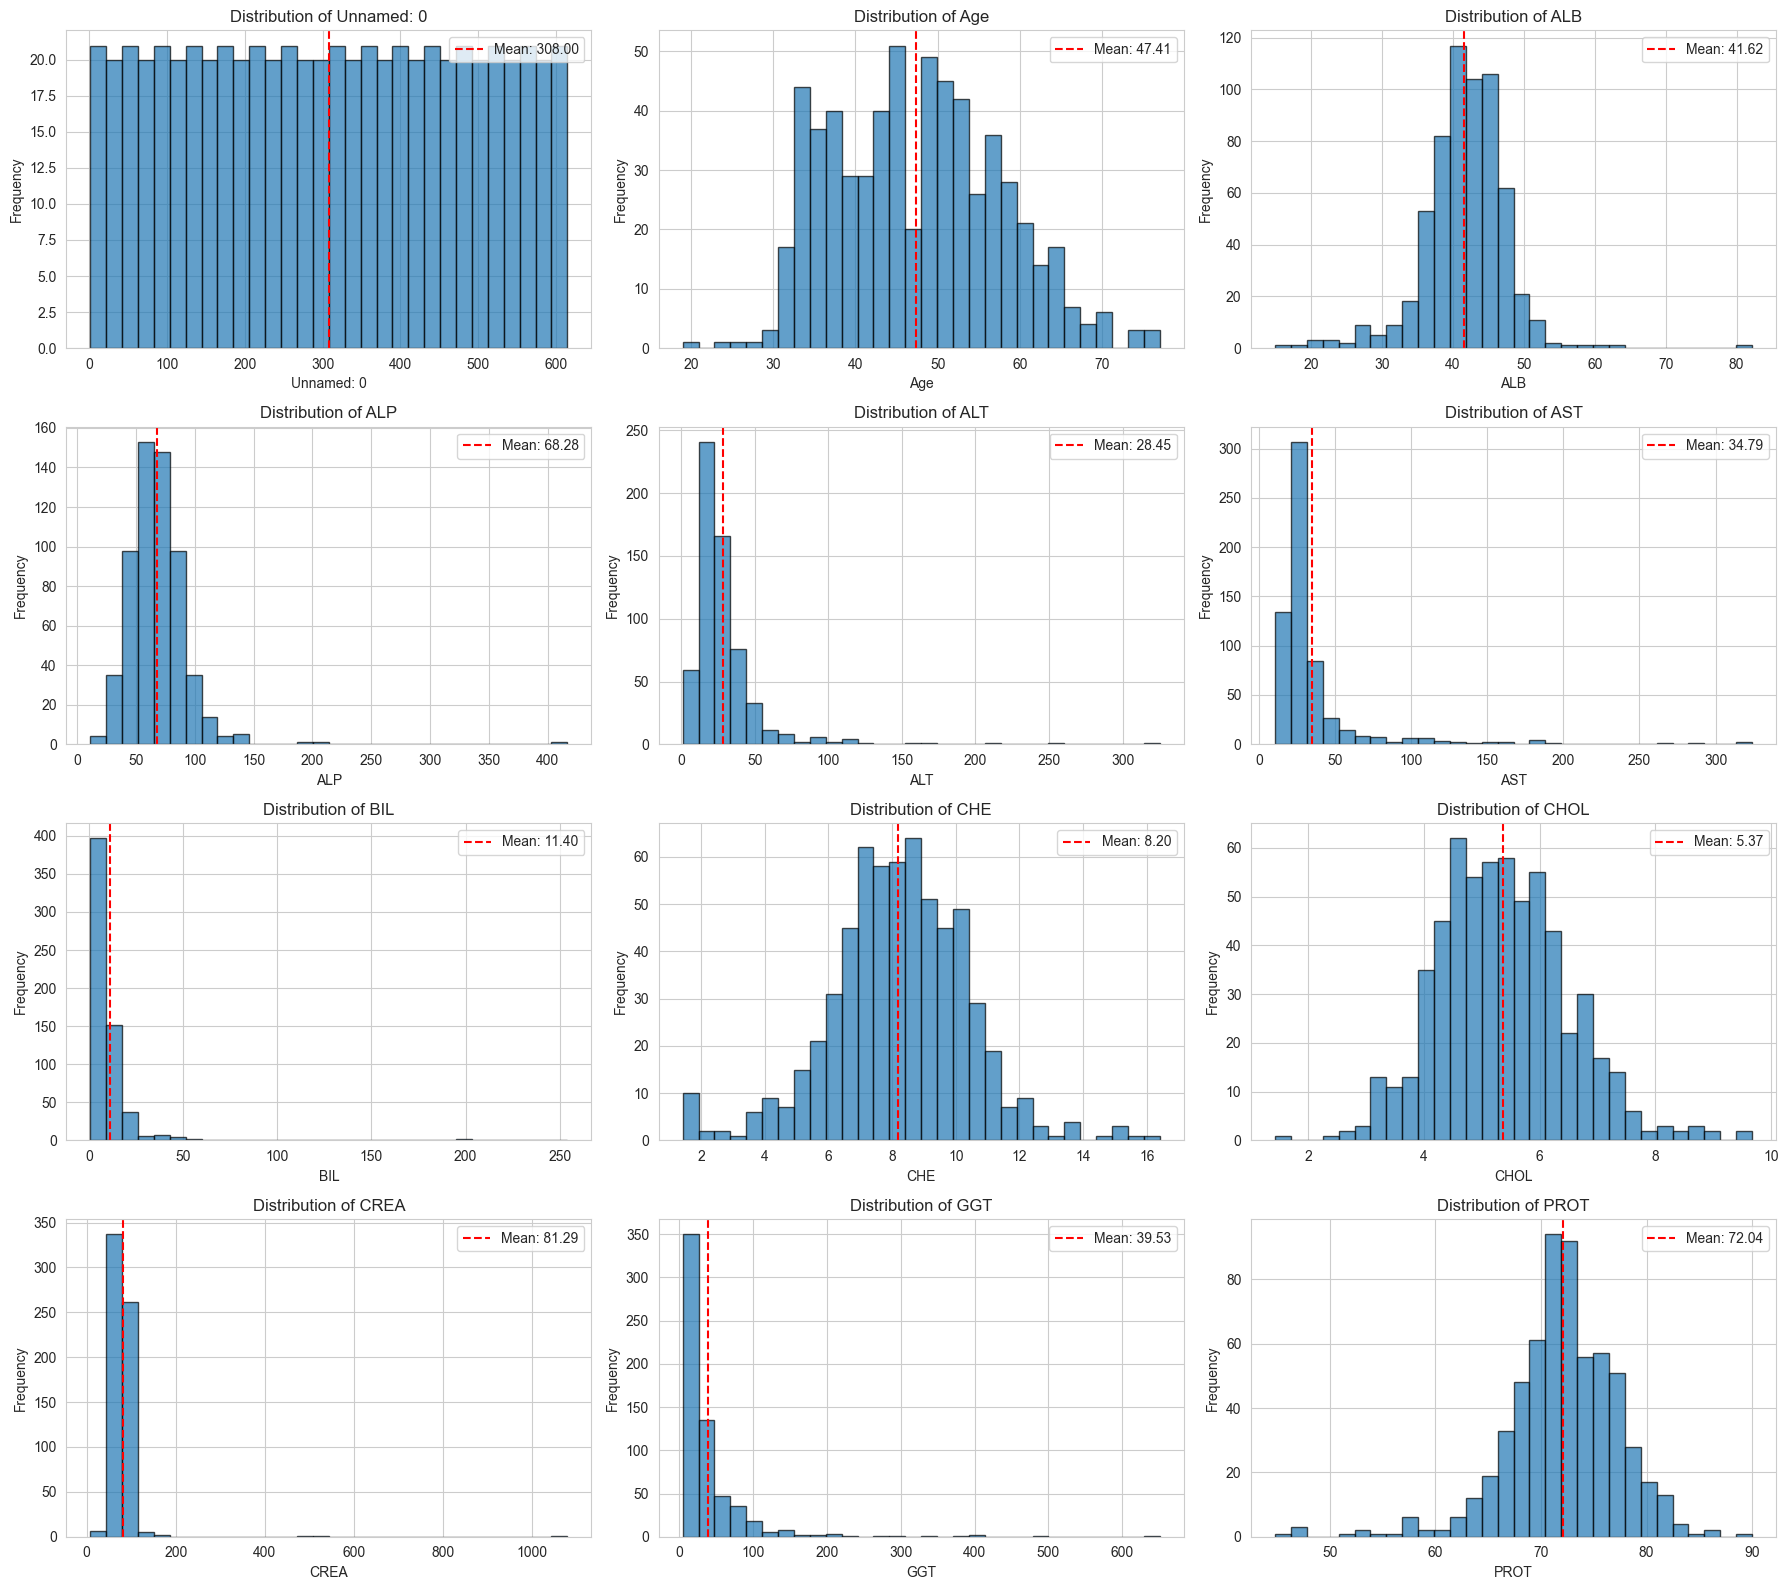


Potential Outliers (values > 3 standard deviations from mean):
ALB: 13 outliers (2.11%)
ALP: 3 outliers (0.49%)
ALT: 10 outliers (1.63%)
AST: 14 outliers (2.28%)
BIL: 7 outliers (1.14%)
CHE: 9 outliers (1.46%)
CHOL: 7 outliers (1.14%)
CREA: 3 outliers (0.49%)
GGT: 10 outliers (1.63%)
PROT: 9 outliers (1.46%)


In [8]:
# Visualize distributions of all numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Category' if it exists in numeric_features
if 'Category' in numeric_features:
    numeric_features.remove('Category')

print(f"Numeric features to plot: {numeric_features}")
print(f"Total numeric features: {len(numeric_features)}")

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, feature in enumerate(numeric_features):
    if idx < len(axes):  # Make sure we don't exceed subplot count
        axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        
        # Add mean line
        mean_val = df[feature].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[idx].legend()

# Hide any unused subplots
for idx in range(len(numeric_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Check for outliers
print("\nPotential Outliers (values > 3 standard deviations from mean):")
for feature in numeric_features:
    mean = df[feature].mean()
    std = df[feature].std()
    outliers = df[(df[feature] < mean - 3*std) | (df[feature] > mean + 3*std)]
    if len(outliers) > 0:
        print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

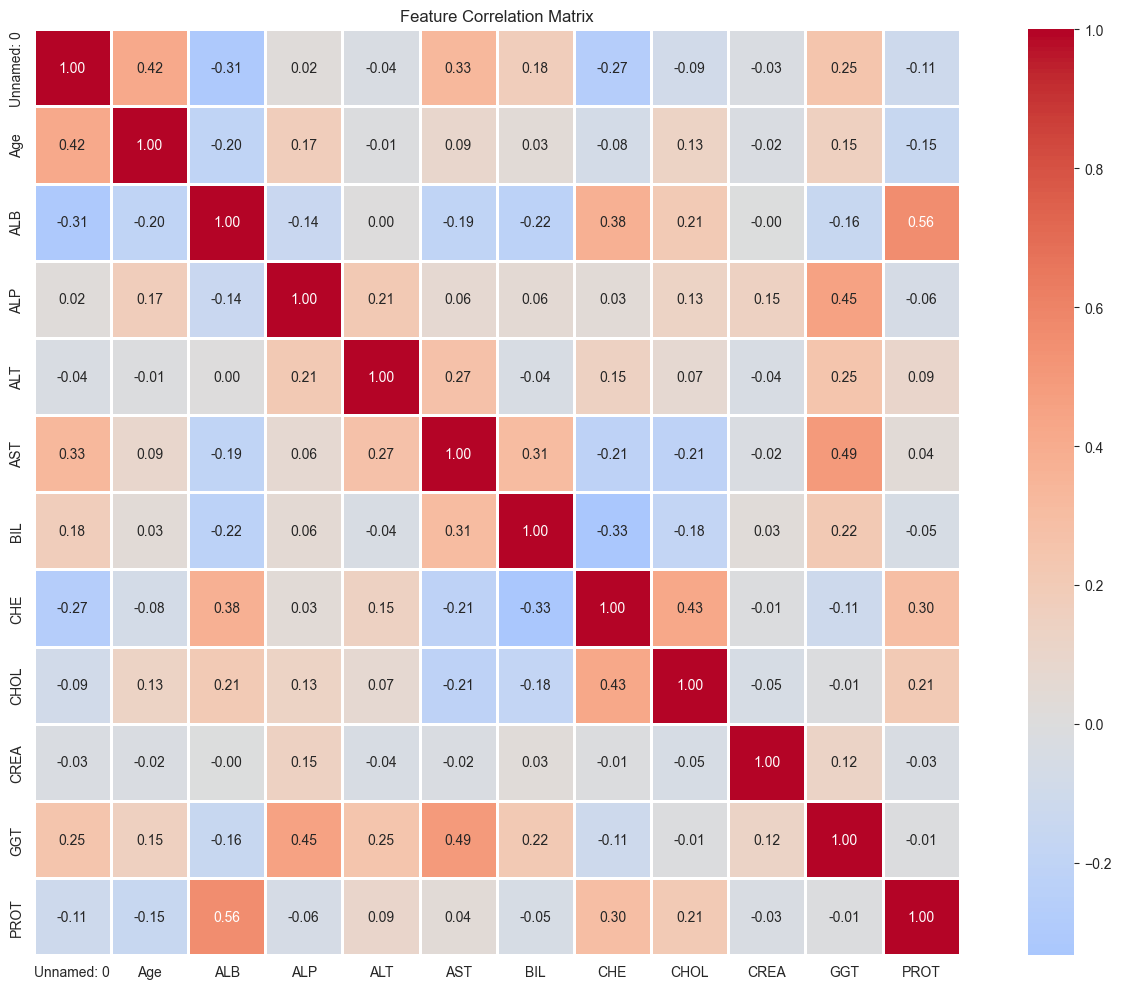


Highly Correlated Feature Pairs (|correlation| > 0.7):


In [9]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find highly correlated features
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

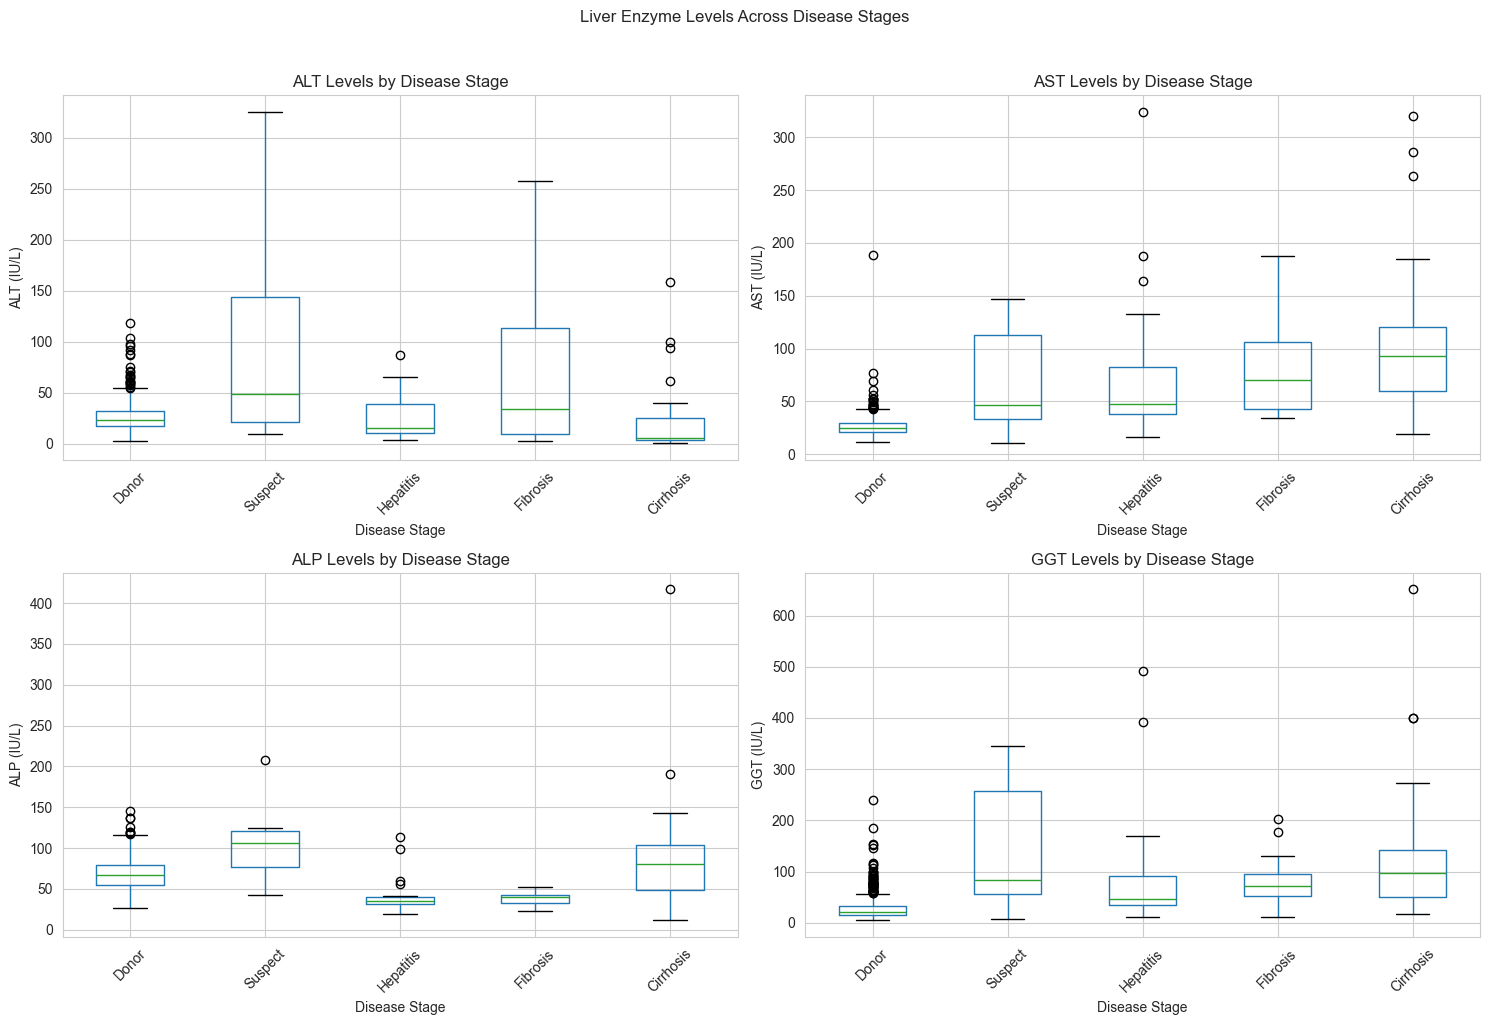


AST/ALT Ratio Statistics by Disease Stage:
                        count   mean    std   min   25%    50%    75%    max
Category                                                                    
0=Blood Donor           533.0   1.15   0.76  0.42  0.85   1.08   1.32  15.84
0s=suspect Blood Donor    7.0   1.43   1.59  0.45  0.54   0.63   1.50   4.83
1=Hepatitis              23.0   3.79   2.30  0.68  2.95   3.64   4.53  11.65
2=Fibrosis               21.0   4.73   7.36  0.41  0.81   3.58   5.41  34.79
3=Cirrhosis              30.0  16.84  17.04  0.64  6.54  14.93  20.58  89.22


In [10]:
# Focus on key liver enzymes
liver_enzymes = ['ALT', 'AST', 'ALP', 'GGT']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, enzyme in enumerate(liver_enzymes):
    # Box plot by disease stage
    df.boxplot(column=enzyme, by='Category', ax=axes[idx])
    axes[idx].set_title(f'{enzyme} Levels by Disease Stage')
    axes[idx].set_xlabel('Disease Stage')
    axes[idx].set_ylabel(f'{enzyme} (IU/L)')
    axes[idx].set_xticklabels(['Donor', 'Suspect', 'Hepatitis', 'Fibrosis', 'Cirrhosis'], 
                              rotation=45)

plt.suptitle('Liver Enzyme Levels Across Disease Stages', y=1.02)
plt.tight_layout()
plt.show()

# Create AST/ALT ratio (important medical marker)
df['AST_ALT_Ratio'] = df['AST'] / df['ALT']
print("\nAST/ALT Ratio Statistics by Disease Stage:")
print(df.groupby('Category')['AST_ALT_Ratio'].describe().round(2))

In [11]:
# Summary of findings
print("🔍 KEY FINDINGS FROM EXPLORATION:")
print("="*50)
print("\n1. CLASS IMBALANCE:")
print("   - Severe imbalance with 86% Blood Donors")
print("   - 'Suspect' class has only 7 samples")
print("   - Will need SMOTE or class weights")

print("\n2. DATA QUALITY:")
print(f"   - {'✅ No missing values' if df.isnull().sum().sum() == 0 else '⚠️ Missing values present'}")
print(f"   - {len(df)} total samples")

print("\n3. FEATURE INSIGHTS:")
print("   - Strong correlations between some liver enzymes")
print("   - AST/ALT ratio shows different patterns across stages")
print("   - Clear separation in enzyme levels between healthy and diseased")

print("\n4. NEXT STEPS:")
print("   - Merge 'Suspect' with 'Hepatitis' (too few samples)")
print("   - Feature engineering (ratios, log transforms)")
print("   - Handle class imbalance")
print("   - Scale features for models")

# Save the processed dataframe for next notebook
df.to_csv('../data/hcv_data_explored.csv', index=False)
print("\n✅ Data saved for preprocessing phase")

🔍 KEY FINDINGS FROM EXPLORATION:

1. CLASS IMBALANCE:
   - Severe imbalance with 86% Blood Donors
   - 'Suspect' class has only 7 samples
   - Will need SMOTE or class weights

2. DATA QUALITY:
   - ⚠️ Missing values present
   - 615 total samples

3. FEATURE INSIGHTS:
   - Strong correlations between some liver enzymes
   - AST/ALT ratio shows different patterns across stages
   - Clear separation in enzyme levels between healthy and diseased

4. NEXT STEPS:
   - Merge 'Suspect' with 'Hepatitis' (too few samples)
   - Feature engineering (ratios, log transforms)
   - Handle class imbalance
   - Scale features for models

✅ Data saved for preprocessing phase
